# **1. Perkenalan Dataset**


# **1. Perkenalan Dataset**

**Dataset Kesejahteraan Pekerja Indonesia**  

**Sumber Dataset**:  
- Kaggle: [Dataset Kesejahteraan Pekerja Indonesia](https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia?select=rataRataUpah.csv)  

**Deskripsi**:  
1. rataRataUpah.csv: Rata-rata upah pekerja per jam (Rp/jam) per provinsi dan tahun  
2. minUpah.csv: Upah Minimum Provinsi (UMP) per tahun  
3. garisKemiskinan.csv: Garis kemiskinan per kapita berdasarkan jenis pengeluaran dan daerah
4. pengeluaran.csv: Rata-rata pengeluaran per kapita

# **2. Import Library**

In [13]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

In [14]:
# Load data
df_upah = pd.read_csv('rataRataUpah.csv')
df_ump = pd.read_csv('minUpah.csv')
df_kemiskinan = pd.read_csv('garisKemiskinan.csv')
df_pengeluaran = pd.read_csv('pengeluaran.csv')

In [15]:
print("Rata-Rata Upah Pekerja per Jam")
print(df_upah.head())

Rata-Rata Upah Pekerja per Jam
  provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065


In [16]:
print("Upah Minimum Provinsi (UMP)")
print(df_pengeluaran.head())

Upah Minimum Provinsi (UMP)
  provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0


In [17]:
print("Garis Kemiskinan per Kapita")
print(df_ump.head())

Garis Kemiskinan per Kapita
  provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   2004  550000.0
3     ACEH   2005  620000.0
4     ACEH   2006  820000.0


In [18]:
print(" Rata-Rata Pengeluaran per Kapita")
print(df_kemiskinan.head())

 Rata-Rata Pengeluaran per Kapita
  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0


In [19]:
# Merge dataset
df_merged = (
    df_upah.merge(df_ump, on=['provinsi','tahun'])
    .merge(df_pengeluaran.query("jenis == 'MAKANAN'"), on=['provinsi','tahun'])
    .merge(df_kemiskinan.query("jenis == 'MAKANAN'"), on=['provinsi','tahun'])
)

In [20]:
# Filter data valid
df = df_merged.dropna().reset_index(drop=True)

In [21]:
print("Jumlah Data:", len(df))
df.head()

Jumlah Data: 4960


,provinsi,tahun,upah,ump,daerah_x,jenis_x,peng,jenis_y,daerah_y,periode,gk
0,ACEH,2015,11226,1900000.0,PERDESAAN,MAKANAN,395136.0,MAKANAN,PERKOTAAN,MARET,293697.0
1,ACEH,2015,11226,1900000.0,PERDESAAN,MAKANAN,395136.0,MAKANAN,PERKOTAAN,SEPTEMBER,302128.0
2,ACEH,2015,11226,1900000.0,PERDESAAN,MAKANAN,395136.0,MAKANAN,PERDESAAN,MARET,297479.0
3,ACEH,2015,11226,1900000.0,PERDESAAN,MAKANAN,395136.0,MAKANAN,PERDESAAN,SEPTEMBER,306737.0
4,ACEH,2015,11226,1900000.0,PERDESAAN,MAKANAN,395136.0,MAKANAN,PERDESAANPERKOTAAN,MARET,296406.0


# **4. Exploratory Data Analysis (EDA)**


In [22]:
print("Informasi Dataset")
print(df.info())

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4960 non-null   object 
 1   tahun     4960 non-null   int64  
 2   upah      4960 non-null   int64  
 3   ump       4960 non-null   float64
 4   daerah_x  4960 non-null   object 
 5   jenis_x   4960 non-null   object 
 6   peng      4960 non-null   float64
 7   jenis_y   4960 non-null   object 
 8   daerah_y  4960 non-null   object 
 9   periode   4960 non-null   object 
 10  gk        4960 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 426.4+ KB
None


In [23]:
print("\nStatistik Deskriptif")
print(df.describe())


Statistik Deskriptif
             tahun          upah           ump           peng             gk
count  4960.000000   4960.000000  4.960000e+03    4960.000000    4960.000000
mean   2018.500000  16473.244758  2.293351e+06  563226.706452  336978.055847
std       2.291519   4200.452918  5.796845e+05  123732.367277   77970.235228
min    2015.000000   8525.000000  9.100000e+05  272347.000000  181842.000000
25%    2016.750000  13396.000000  1.875000e+06  472220.000000  278277.000000
50%    2018.500000  15823.000000  2.266722e+06  556747.000000  326791.000000
75%    2020.250000  18411.000000  2.678863e+06  640957.000000  384442.500000
max    2022.000000  32685.000000  4.641854e+06  953320.000000  641806.000000


### Statistik Deskriptif

**Rata-rata**

* Upah pekerja per jam Rp 16.473 (Rentang: Rp 8.525 - Rp 32.685)
* Upah Minimum Provinsi (UMP) Rp 2.293.351
* Garis kemiskinan per kapita Rp 336.978
* Pengeluaran per kapita Rp 563.226


**Observasi data**

* Data memiliki 4960 entries dan tidak ada *missing values*.
* Variasi yang cukup besar di setiap variabel, ditunjukkan oleh nilai standar deviasi (std) yang relatif tinggi. Contohnya Standar deviasi upah sebesar Rp 4.200 yang menunjukkan adanya sebaran data upah yang cukup luas di sekitar rata-ratanya

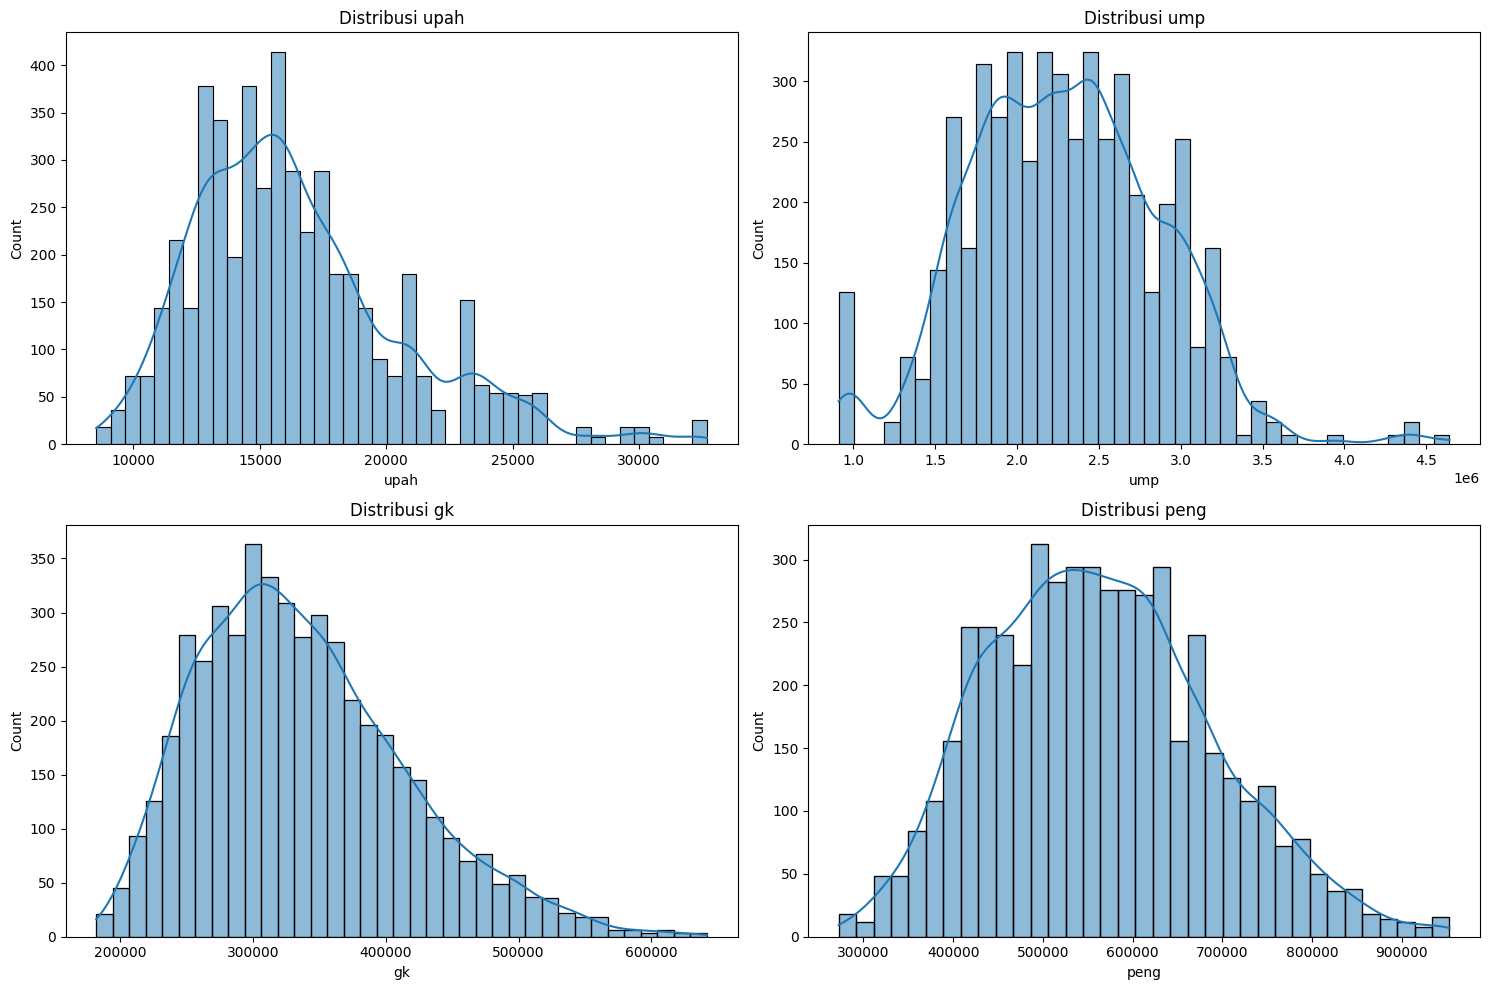

In [24]:
# Visualisasi distribusi
plt.figure(figsize=(15,10))
for i,col in enumerate(['upah','ump','gk','peng'],1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Matriks Korelasi')

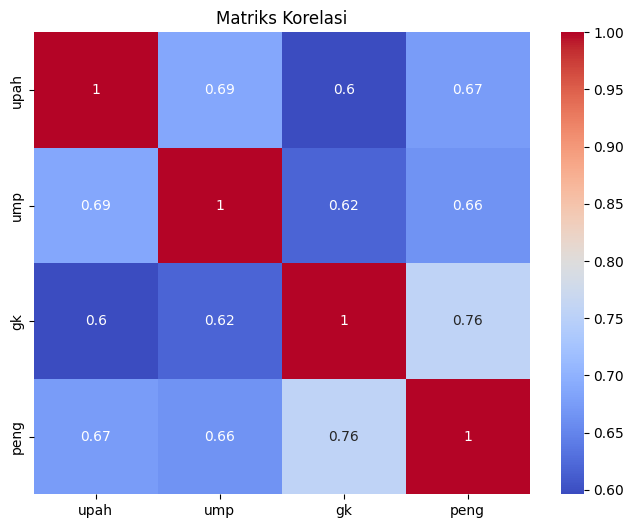

In [25]:
# Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df[['upah','ump','gk','peng']].corr(),
           annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')

# **5. Data Preprocessing**

In [26]:
# Handle outlier dengan IQR
Q1 = df[['upah','ump','gk','peng']].quantile(0.25)
Q3 = df[['upah','ump','gk','peng']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['upah','ump','gk','peng']] < (Q1 - 1.5*IQR)) |
          (df[['upah','ump','gk','peng']] > (Q3 + 1.5*IQR))).any(axis=1)]

In [27]:
# Encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['upah','ump','gk','peng']),
        ('cat', OneHotEncoder(), ['provinsi'])
])

In [28]:
X_processed = preprocessor.fit_transform(df)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [29]:
# Inisiasi dan Model Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_processed)

## **b. Evaluasi Model Clustering**

Text(0.5, 1.0, 'Elbow Method')

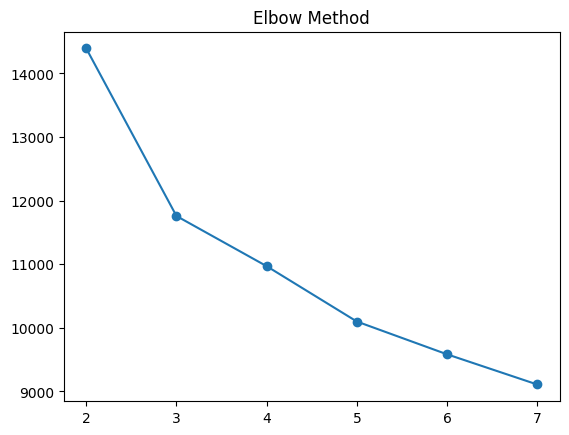

In [30]:
# Evaluasi Model Clustering
# Elbow Method
wcss = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,8), wcss, marker='o')
plt.title('Elbow Method')

In [31]:
# Silhouette Score
silhouette_scores = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X_processed)
    silhouette_scores.append(silhouette_score(X_processed, cluster_labels))

print("Silhouette Scores:", silhouette_scores)

Silhouette Scores: [np.float64(0.30171566299501573), np.float64(0.22069895117778549), np.float64(0.15663254808187008), np.float64(0.15550293145301616), np.float64(0.16514324370048358), np.float64(0.13959757382368995)]


## **c. Visualisasi Hasil Clustering**

Text(0.5, 1.0, 'Visualisasi Cluster (2D PCA)')

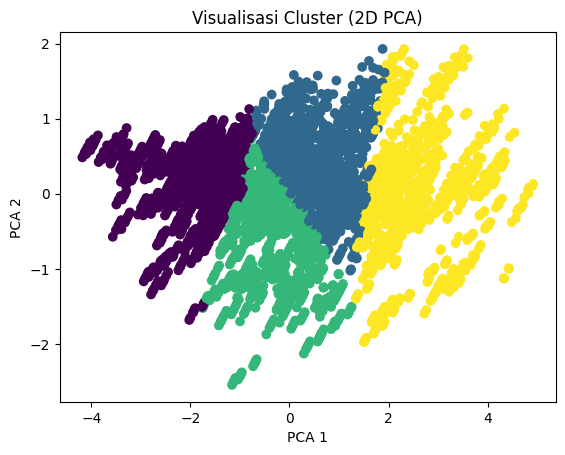

In [32]:
# Visualisasi Hasil Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster (2D PCA)')

## **e. Analisis dan Interpretasi Hasil Cluster**

In [33]:
# Inverse transform
df_cluster = df.copy()
df_cluster['Cluster'] = clusters

In [34]:
# Agregasi numerik
cluster_profile = df_cluster.groupby('Cluster').agg({
    'upah': ['mean','min','max'],
    'ump': ['mean','min','max'],
    'gk': 'mean',
    'peng': 'mean'
})

In [38]:
# Interpretasi
print("\nProfil Cluster:")
for cluster in cluster_profile.index:
    print(f"\nCluster {cluster}:")
    print(f"- Rata-rata Upah: {cluster_profile.loc[cluster, ('upah','mean')]:.2f} (Min: {cluster_profile.loc[cluster, ('upah','min')]:.2f}, Max: {cluster_profile.loc[cluster, ('upah','max')]:.2f})")
    print(f"- Rata-rata UMP: {cluster_profile.loc[cluster, ('ump','mean')]:.2f}")
    print(f"- Rata-rata Garis Kemiskinan: {cluster_profile.loc[cluster, ('gk','mean')]:.2f}")
    print(f"- Rata-rata Pengeluaran: {cluster_profile.loc[cluster, ('peng','mean')]:.2f}")



Profil Cluster:

Cluster 0:
- Rata-rata Upah: 12407.97 (Min: 8525.00, Max: 16843.00)
- Rata-rata UMP: 1658239.42
- Rata-rata Garis Kemiskinan: 268815.26
- Rata-rata Pengeluaran: 439099.84

Cluster 1:
- Rata-rata Upah: 16178.50 (Min: 11734.00, Max: 21156.00)
- Rata-rata UMP: 2344831.66
- Rata-rata Garis Kemiskinan: 365463.64
- Rata-rata Pengeluaran: 604025.16

Cluster 2:
- Rata-rata Upah: 16334.06 (Min: 11779.00, Max: 23444.00)
- Rata-rata UMP: 2329754.21
- Rata-rata Garis Kemiskinan: 288952.21
- Rata-rata Pengeluaran: 513681.07

Cluster 3:
- Rata-rata Upah: 21051.44 (Min: 14822.00, Max: 25736.00)
- Rata-rata UMP: 2876553.58
- Rata-rata Garis Kemiskinan: 420875.63
- Rata-rata Pengeluaran: 704003.62


### Interpretasi Cluster   


#### **Cluster 0**  
- **Rata-rata Upah**: Rp12.407,97 (Min: Rp8.525, Max: Rp16.843)  
- **Rata-rata UMP**: Rp1.658.239,42  
- **Rata-rata Garis Kemiskinan**: Rp268.815,26  
- **Rata-rata Pengeluaran**: Rp439.099,84  

**Analisis**:  
Cluster ini menunjukkan pekerja dengan upah relatif rendah dan pengeluaran di bawah rata-rata. Meskipun UMP provinsi mereka tergolong sedang, pengeluaran mereka cenderung mendekati garis kemiskinan. Karakteristik menunjukkan kelompok pekerja yang mungkin hidup secara hemat atau bekerja dengan pendapatan tidak tetap  

---

#### **Cluster 1**  
- **Rata-rata Upah**: Rp16.178,50 (Min: Rp11.734, Max: Rp21.156)  
- **Rata-rata UMP**: Rp2.344.831,66  
- **Rata-rata Garis Kemiskinan**: Rp365.463,64  
- **Rata-rata Pengeluaran**: Rp604.025,16  

**Analisis**:  
Cluster ini mencakup pekerja dengan upah menengah dan pengeluaran cukup/menengah. UMP provinsi mereka tergolong tinggi, tetapi pengeluaran mereka masih di bawah kemampuan finansial. Ini menunjukkan kelompok pekerja yang stabil secara finansial, mungkin bekerja dengan pendapatan tetap, tetapi belum mencapai tingkat konsumsi optimal  

---

#### **Cluster 2**  
- **Rata-rata Upah**: Rp16.334,06 (Min: Rp11.779, Max: Rp23.444)  
- **Rata-rata UMP**: Rp2.329.754,21  
- **Rata-rata Garis Kemiskinan**: Rp288.952,21  
- **Rata-rata Pengeluaran**: Rp513.681,07  

**Analisis**:  
Cluster ini unik karena memiliki upah menengah-tinggi, tetapi pengeluaran relatif rendah dibandingkan UMP. Garis kemiskinan yang rendah menunjukkan biaya hidup di provinsi ini terjangkau.

---

#### **Cluster 3**  
- **Rata-rata Upah**: Rp21.051,44 (Min: Rp14.822, Max: Rp25.736)  
- **Rata-rata UMP**: Rp2.876.553,58  
- **Rata-rata Garis Kemiskinan**: Rp420.875,63  
- **Rata-rata Pengeluaran**: Rp704.003,62  

**Analisis**:  
Cluster ini merupakan kelompok pekerja dengan upah tertinggi dan pengeluaran juga tinggi. UMP yang tinggi dan garis kemiskinan yang tinggi menunjukkan provinsi dengan biaya hidup tinggi.

---

### **Insight**  
1. Terdapat perbedaan yang tinggi antara upah tertinggi (Cluster 3) dan terendah (Cluster 0)
2. Cluster 3 cenderung hidup mewah, sementara Cluster 0 dan 2 lebih hemat  
3. UMP tinggi tidak selalu diikuti pengeluaran tinggi (contoh: Cluster 2)  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
# Save to csv
df_cluster.to_csv('clustering_pekerja.csv', index=False)